# Алгоритмы

In [2]:
from gmpy2 import powmod
import sys


def algoritm_1(a, q):
    """q = 5 (mod 8)"""
    b = powmod(2 * a, (q - 5) // 8, q)
    i = (2 * a * (b ** 2)) % q
    x = (a * b * (i - 1)) % q
    return x


def algoritm_2(a, q):
    """q = 9 (mod 16)"""
    b = powmod(2 * a, (q - 1) // 4, q)
    if b == q - 1:
        b = -1

    d = 0
    for j_d in range(2, q):
        if -b == kronecker(j_d, q):
            d = j_d
            break
    if d == 0:
        sys.exit("Can not find d")

    u = powmod(2 * a * (d ** 2), (q - 9) // 16, q)
    i = (2 * (u ** 2) * (d ** 2) * a) % q
    x = (u * d * a * (i - 1)) % q
    return x


def algoritm_3(a, q):
    """q = 9 (mod 16)"""
    b = powmod(2 * a, (q - 9) // 16, q)
    i = (2 * a * (b ** 2)) % q
    r = (i ** 2) % q
    if r == q - 1:
        x = (a * b * (i - 1)) % q
    else:
        d = 0
        for j_d in range(2, q):
            if kronecker(j_d, q) == -1:
                d = j_d
                break
        if d == 0:
            sys.exit("Can not find d")

        u = b * powmod(d, (q - 9) // 8, q) % q
        i = (2 * (u ** 2) * (d ** 2) * a) % q
        x = (u * d * a * (i - 1)) % q
    return x


def algoritm_4(c, q, xi):
    """q = 5 (mod 8); s = 2"""
    b = powmod(c, (q - 5) // 8, q)
    zeta = (c * (b ** 2)) % q
    if zeta == 1:
        x = (c * b) % q
    else:
        x = (c * b * xi) % q
    return x


def algoritm_5(c, q, xi):
    """q = 9 (mod 16); s = 3"""
    b = powmod(c, (q - 9) // 16, q)
    zeta = (c * (b ** 2)) % q
    if zeta == 1:
        x = (c * b) % q
    elif zeta == q - 1:
        x = (c * b * (xi ** 2)) % q
    elif zeta == (xi ** 2) % q:
        x = (c * b * (xi ** 3)) % q
    else:
        x = (c * b * xi) % q
    return x


def algoritm_6(c, q, xi):
    """q = 17 (mod 32); s = 4"""
    b = powmod(c, (q - 17) // 32, q)
    X = (c * b) % q
    zeta = (X * b) % q
    A = xi
    B = (A ** 2) % q
    C = (B ** 2) % q
    D = (B * C) % q

    if zeta == 1:
        x = X
    elif zeta == q - 1:
        x = (X * C) % q
    elif zeta == B:
        x = (X * A * D) % q
    elif zeta == q - B:
        x = (X * A * B) % q
    elif zeta == C:
        x = (X * D) % q
    elif zeta == q - C:
        x = (X * B) % q
    elif zeta == D:
        x = (X * A * C) % q
    elif zeta == q - D:
        x = (X * A) % q
    else:
        x = 0
    return x


def xi_value(q, s):
    d = 0
    for j_d in range(2, q):
        if kronecker(j_d, q) == -1:
            d = j_d
            break
    if d == 0:
        sys.exit("Can not find d")
    xi = powmod(d, (q - 1) // (2 ** s), q)
    return xi

# Тесты

In [79]:
def test_456(s, q, c, alg):
    mod_s = 2 ** (s + 1)
    print(q, '=', q % mod_s, 'mod', mod_s, '; Символ Лежандра (c/q) =', kronecker(c, q))
    xi = xi_value(q, s)
    x = alg(c, q, xi)
    print('x =', x, '; x^2 =', x ** 2 % q, '; c =', c)
    print('Проверка равенства:', x ** 2 % q == c)

In [80]:
test_456(2, 50461, 111, algoritm_4)

50461 = 5 mod 8 ; Символ Лежандра (c/q) = 1
x = 31367 ; x^2 = 111 ; c = 111
Проверка равенства: True


In [81]:
test_456(2, 517613, 500000, algoritm_4)

517613 = 5 mod 8 ; Символ Лежандра (c/q) = -1
x = 385506 ; x^2 = 419541 ; c = 500000
Проверка равенства: False


In [82]:
test_456(3, 544793, 404, algoritm_5)

544793 = 9 mod 16 ; Символ Лежандра (c/q) = 1
x = 418943 ; x^2 = 404 ; c = 404
Проверка равенства: True


In [83]:
test_456(3, 160025, 17, algoritm_5)

160025 = 9 mod 16 ; Символ Лежандра (c/q) = 1
x = 8778 ; x^2 = 81259 ; c = 17
Проверка равенства: False


In [84]:
test_456(4, 50126833, 111111, algoritm_6)

50126833 = 17 mod 32 ; Символ Лежандра (c/q) = 1
x = 1978118 ; x^2 = 111111 ; c = 111111
Проверка равенства: True


In [85]:
test_456(4, 700139537, 111111, algoritm_6)

700139537 = 17 mod 32 ; Символ Лежандра (c/q) = -1
x = 0 ; x^2 = 0 ; c = 111111
Проверка равенства: False


In [86]:
def test_123(s, q, c, alg):
    mod_s = 2 ** (s + 1)
    print(q, '=', q % mod_s, 'mod', mod_s, '; Символ Лежандра (c/q) =', kronecker(c, q))
    x = alg(c, q)
    print('x =', x, '; x^2 =', x ** 2 % q, '; c =', c)
    print('Проверка равенства:', x ** 2 % q == c)

In [87]:
test_123(2, 10141, 1111, algoritm_1)

10141 = 5 mod 8 ; Символ Лежандра (c/q) = 1
x = 1895 ; x^2 = 1111 ; c = 1111
Проверка равенства: True


In [88]:
test_123(2, 1001093, 7707, algoritm_1)

1001093 = 5 mod 8 ; Символ Лежандра (c/q) = 1
x = 147179 ; x^2 = 7707 ; c = 7707
Проверка равенства: True


In [89]:
test_123(2, 305101, 666, algoritm_1)

305101 = 5 mod 8 ; Символ Лежандра (c/q) = -1
x = 0 ; x^2 = 0 ; c = 666
Проверка равенства: False


In [90]:
test_123(3, 11801, 23, algoritm_2)

11801 = 9 mod 16 ; Символ Лежандра (c/q) = 1
x = 2221 ; x^2 = 23 ; c = 23
Проверка равенства: True


In [91]:
test_123(3, 1009433, 234567, algoritm_2)

1009433 = 9 mod 16 ; Символ Лежандра (c/q) = 1
x = 747634 ; x^2 = 234567 ; c = 234567
Проверка равенства: True


In [92]:
test_123(3, 11801, 23, algoritm_3)

11801 = 9 mod 16 ; Символ Лежандра (c/q) = 1
x = 2221 ; x^2 = 23 ; c = 23
Проверка равенства: True


In [93]:
test_123(3, 1009433, 234567, algoritm_3)

1009433 = 9 mod 16 ; Символ Лежандра (c/q) = 1
x = 747634 ; x^2 = 234567 ; c = 234567
Проверка равенства: True


In [94]:
test_123(3, 1625, 98, algoritm_3)

1625 = 9 mod 16 ; Символ Лежандра (c/q) = 1
x = 438 ; x^2 = 94 ; c = 98
Проверка равенства: False


# Получение q, c, xi 

In [23]:
from sympy import randprime
from random import randint
nums = [2 ** 32, 2 ** 48, 2 ** 64, 2 ** 96, 2 ** 128]


"""q = 5 (mod 8); s = 2"""
lst_q_c_xi_8 = []
for num in nums:
    i = 0
    while i < 999:
        q = Integer(randprime(num - (2 ** 32), num))
        if q % 8 == 5:
            c = randint(2, q)
            while kronecker(c, q) != 1:
                c = randint(2, q)
            lst_q_c_xi_8.append([q, c, xi_value(q, 2)])
            i = i + 1


"""q = 9 (mod 16); s = 3"""
lst_q_c_xi_16 = []
for num in nums:
    i = 0
    while i < 999:
        q = Integer(randprime(num - (2 ** 32), num))
        if q % 16 == 9:
            c = randint(2, q)
            while kronecker(c, q) != 1:
                c = randint(2, q)
            lst_q_c_xi_16.append([q, c, xi_value(q, 3)])
            i = i + 1

"""q = 17 (mod 32); s = 4"""
lst_q_c_xi_32 = []
for num in nums:
    i = 0
    while i < 999:
        q = Integer(randprime(num - (2 ** 32), num))
        if q % 32 == 17:
            c = randint(2, q)
            while kronecker(c, q) != 1:
                c = randint(2, q)
            lst_q_c_xi_32.append([q, c, xi_value(q, 4)])
            i = i + 1

# Вычисление среднего времени для всех алгоритмов

In [24]:
len(lst_q_c_xi_8)

4995

In [295]:
from time import perf_counter

"""Алгоритм 1 (Аткин); q = 5 (mod 8); s = 2"""
lst_time_1 = []
for lst in lst_q_c_xi_8:
    q = lst[0] + 0
    c = lst[1] + 0
    
    t1 = perf_counter()
    algoritm_1(c, q)
    t2 = perf_counter()
    lst_time_1.append(t2 - t1)


composite_list_time_1 = [lst_time_1[x:x+999] for x in range(0, len(lst_time_1), 999)]
average_time_1 = [sum(x)/len(x) for x in composite_list_time_1]
print(average_time_1)



[6.780376474921354e-05, 5.1516291273651655e-05, 5.3917166162256886e-05, 0.00010936582482470483, 0.00013787507307645505]


In [261]:
"""Алгоритм 2 (Мюллер); q = 9 (mod 16); s = 3"""
lst_time_2 = []
for lst in lst_q_c_xi_16:
    q = lst[0] + 0
    c = lst[1] + 0
    
    t1 = perf_counter()
    algoritm_2(c, q)
    t2 = perf_counter()
    lst_time_2.append(t2 - t1)


composite_list_time_2 = [lst_time_2[x:x+999] for x in range(0, len(lst_time_2), 999)]
average_time_2 = [sum(x)/len(x) for x in composite_list_time_2]
print(average_time_2)

[0.0002441356626676296, 0.00010412843041742783, 0.00024241294393922053, 0.00026227115915309615, 0.00033332195996424506]


In [282]:
"""Алгоритм 3 (Конг); q = 9 (mod 16); s = 3"""
lst_time_3 = []
for lst in lst_q_c_xi_16:
    q = lst[0] + 0
    c = lst[1] + 0
    
    t1 = perf_counter()
    algoritm_3(c, q)
    t2 = perf_counter()
    lst_time_3.append(t2 - t1)


composite_list_time_3 = [lst_time_3[x:x+999] for x in range(0, len(lst_time_3), 999)]
average_time_3 = [sum(x)/len(x) for x in composite_list_time_3]
print(average_time_3)

[0.00016172854152678333, 0.00010933435033121396, 0.00017692546447819354, 0.00021757552454451448, 0.0003053781922028031]


In [301]:
"""Алгоритм 4 ; q = 5 (mod 8); s = 2"""
lst_time_4 = []
for lst in lst_q_c_xi_8:
    q = lst[0] + 0
    c = lst[1] + 0
    xi = lst[2] + 0
    
    t1 = perf_counter()
    algoritm_4(c, q, xi)
    t2 = perf_counter()
    lst_time_4.append(t2 - t1)


composite_list_time_4 = [lst_time_4[x:x+999] for x in range(0, len(lst_time_4), 999)]
average_time_4 = [sum(x)/len(x) for x in composite_list_time_4]
print(average_time_4)

[4.331678076972288e-05, 6.373897399685307e-05, 6.184658859210258e-05, 8.86412562449022e-05, 0.00014978398799526572]


In [204]:
"""Алгоритм 5 ; q = 9 (mod 16); s = 3"""
lst_time_5 = []
for lst in lst_q_c_xi_8:
    q = lst[0] + 0
    c = lst[1] + 0
    xi = lst[2] + 0
    
    t1 = perf_counter()
    algoritm_5(c, q, xi)
    t2 = perf_counter()
    lst_time_5.append(t2 - t1)


composite_list_time_5 = [lst_time_5[x:x+999] for x in range(0, len(lst_time_5), 999)]
average_time_5 = [sum(x)/len(x) for x in composite_list_time_5]
print(average_time_5)

[0.00011485449649480724, 9.134329428724249e-05, 0.00017030642741267478, 0.00013326453152329122, 0.0002293658548728194]


In [313]:
"""Алгоритм 6 ; q = 17 (mod 32); s = 4"""
lst_time_6 = []
for lst in lst_q_c_xi_8:
    q = lst[0] + 0
    c = lst[1] + 0
    xi = lst[2] + 0
    
    t1 = perf_counter()
    algoritm_6(c, q, xi)
    t2 = perf_counter()
    lst_time_6.append(t2 - t1)


composite_list_time_6 = [lst_time_6[x:x+999] for x in range(0, len(lst_time_6), 999)]
average_time_6 = [sum(x)/len(x) for x in composite_list_time_6]
print(average_time_6)

[0.00022531325925724145, 0.0002471204654677815, 0.00022091785586445103, 0.0002577222752683105, 0.00025206390590436467]


# Графики

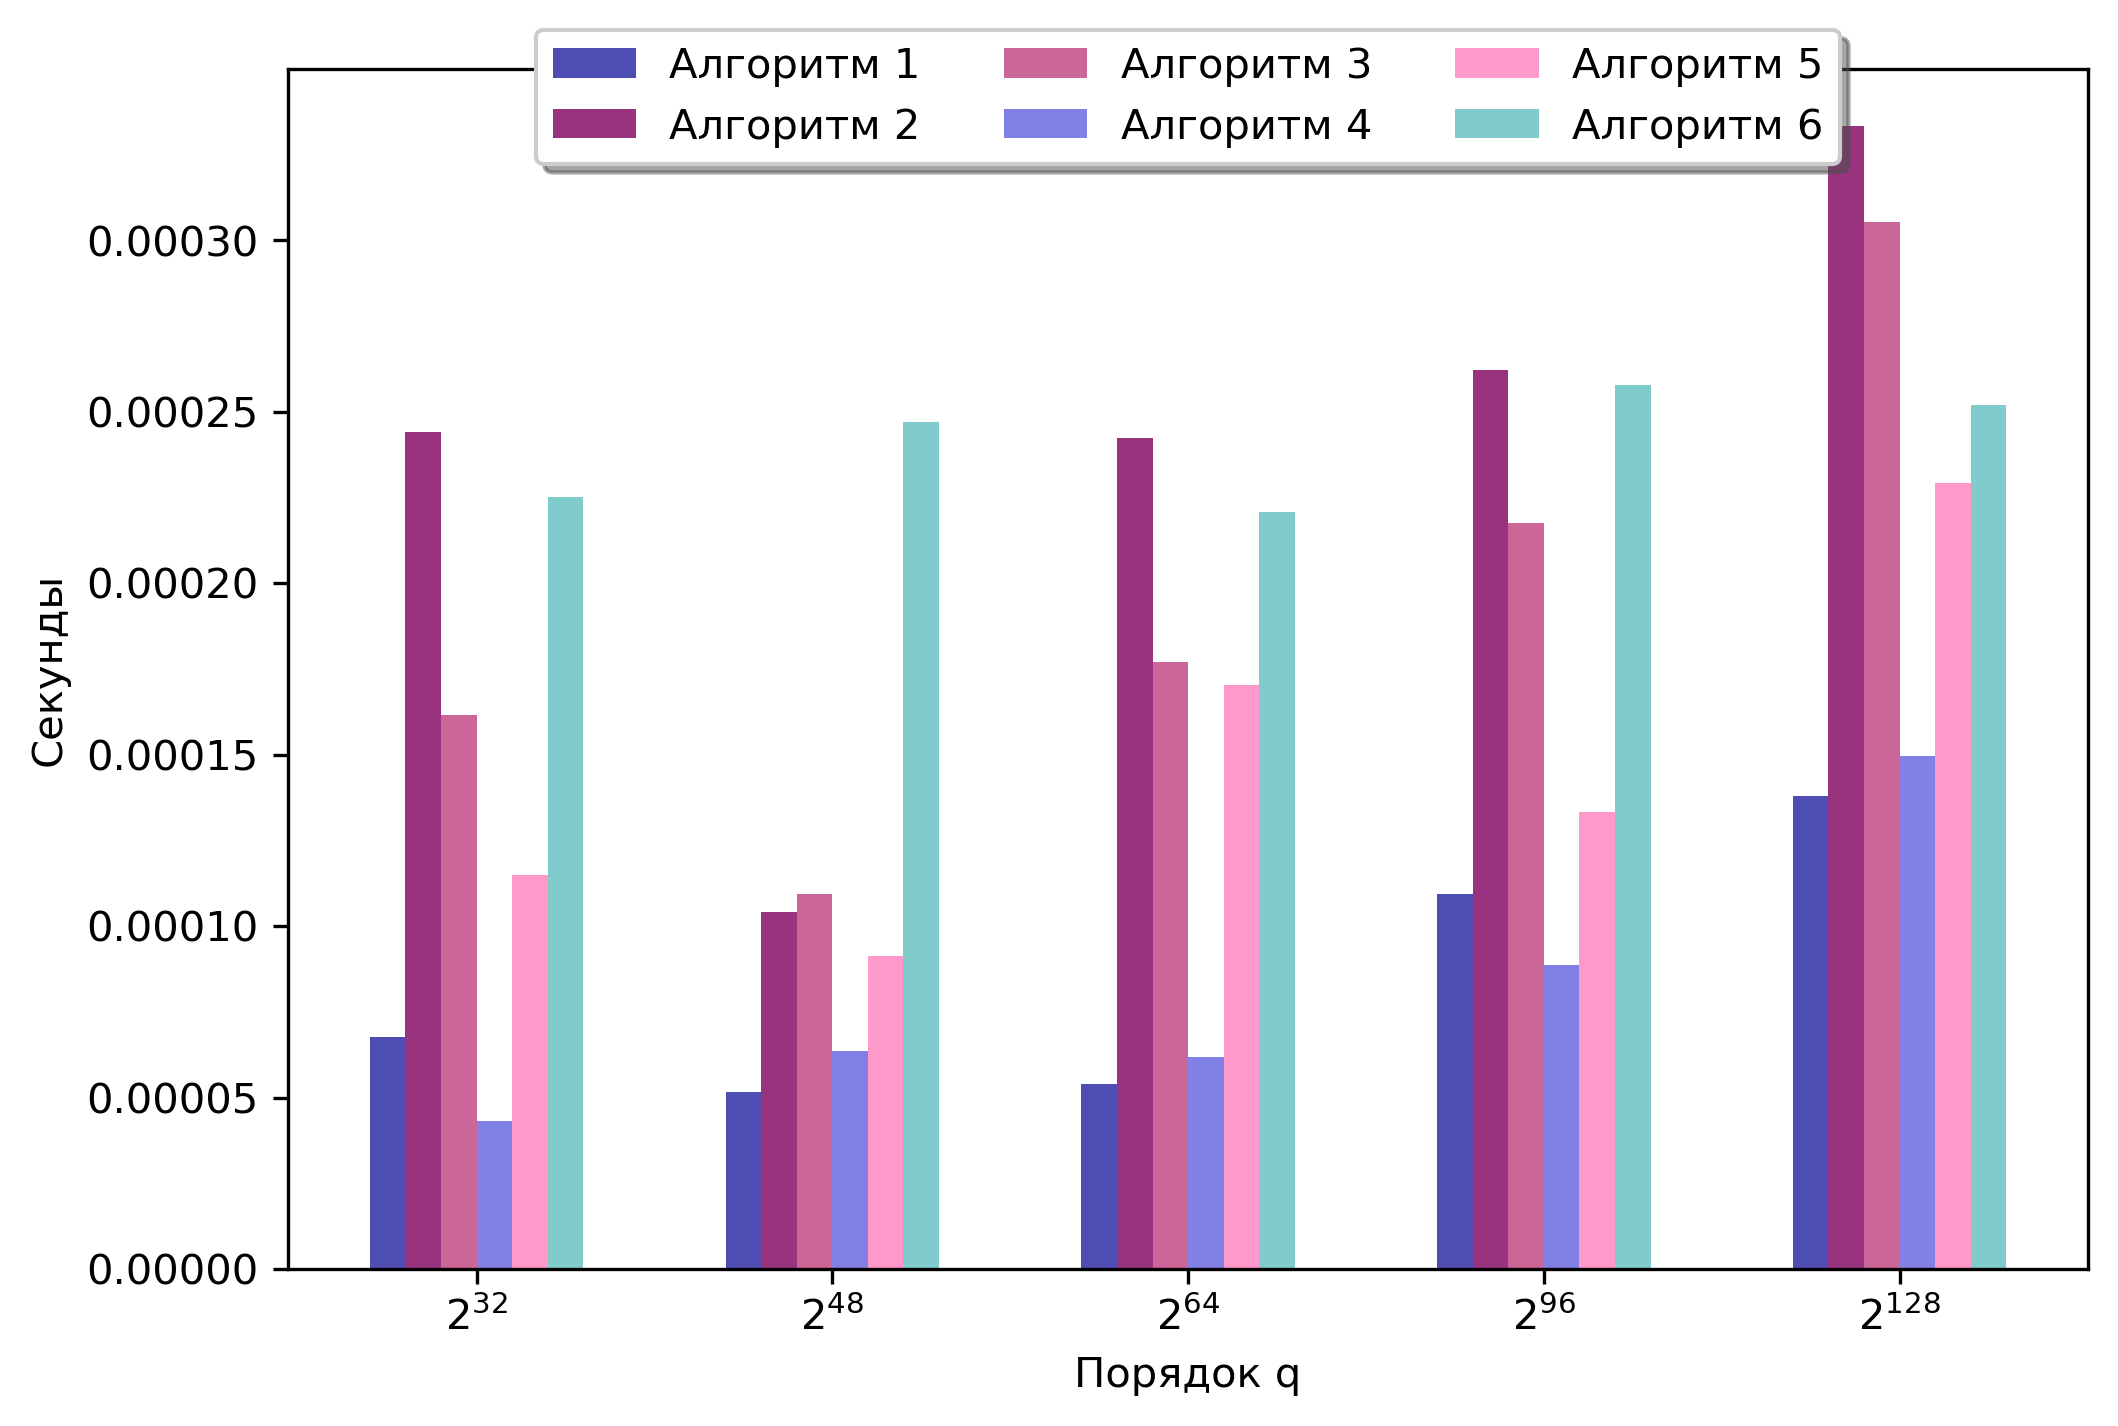

In [340]:
import matplotlib.pyplot as plt
import numpy as np
colors_list = [(0.3, 0.3, 0.7), (0.6, 0.2, 0.5), (0.8, 0.4, 0.6), (0.5, 0.5, 0.9), (1.0, 0.6, 0.8), (0.5, 0.8, 0.8)]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
#plt.style.use("bmh")

ind = np.arange(5)
width = 0.1
ax.bar(ind,average_time_1, width, label="Алгоритм 1",color=colors_list[0])
ax.bar(ind + width,average_time_2, width,label="Алгоритм 2",color=colors_list[1])
ax.bar(ind + 2*width,average_time_3, width,label="Алгоритм 3",color=colors_list[2])
ax.bar(ind + 3*width,average_time_4, width,label="Алгоритм 4",color=colors_list[3])
ax.bar(ind + 4*width,average_time_5, width,label="Алгоритм 5",color=colors_list[4])
ax.bar(ind + 5*width,average_time_6, width,label="Алгоритм 6",color=colors_list[5])
plt.xticks(ind + 2.5*width, ("$2^{32}$", "$2^{48}$", "$2^{64}$", "$2^{96}$", "$2^{128}$"))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.xlabel("Порядок q")
plt.ylabel("Секунды")
plt.gcf().set_dpi(300)

plt.show()

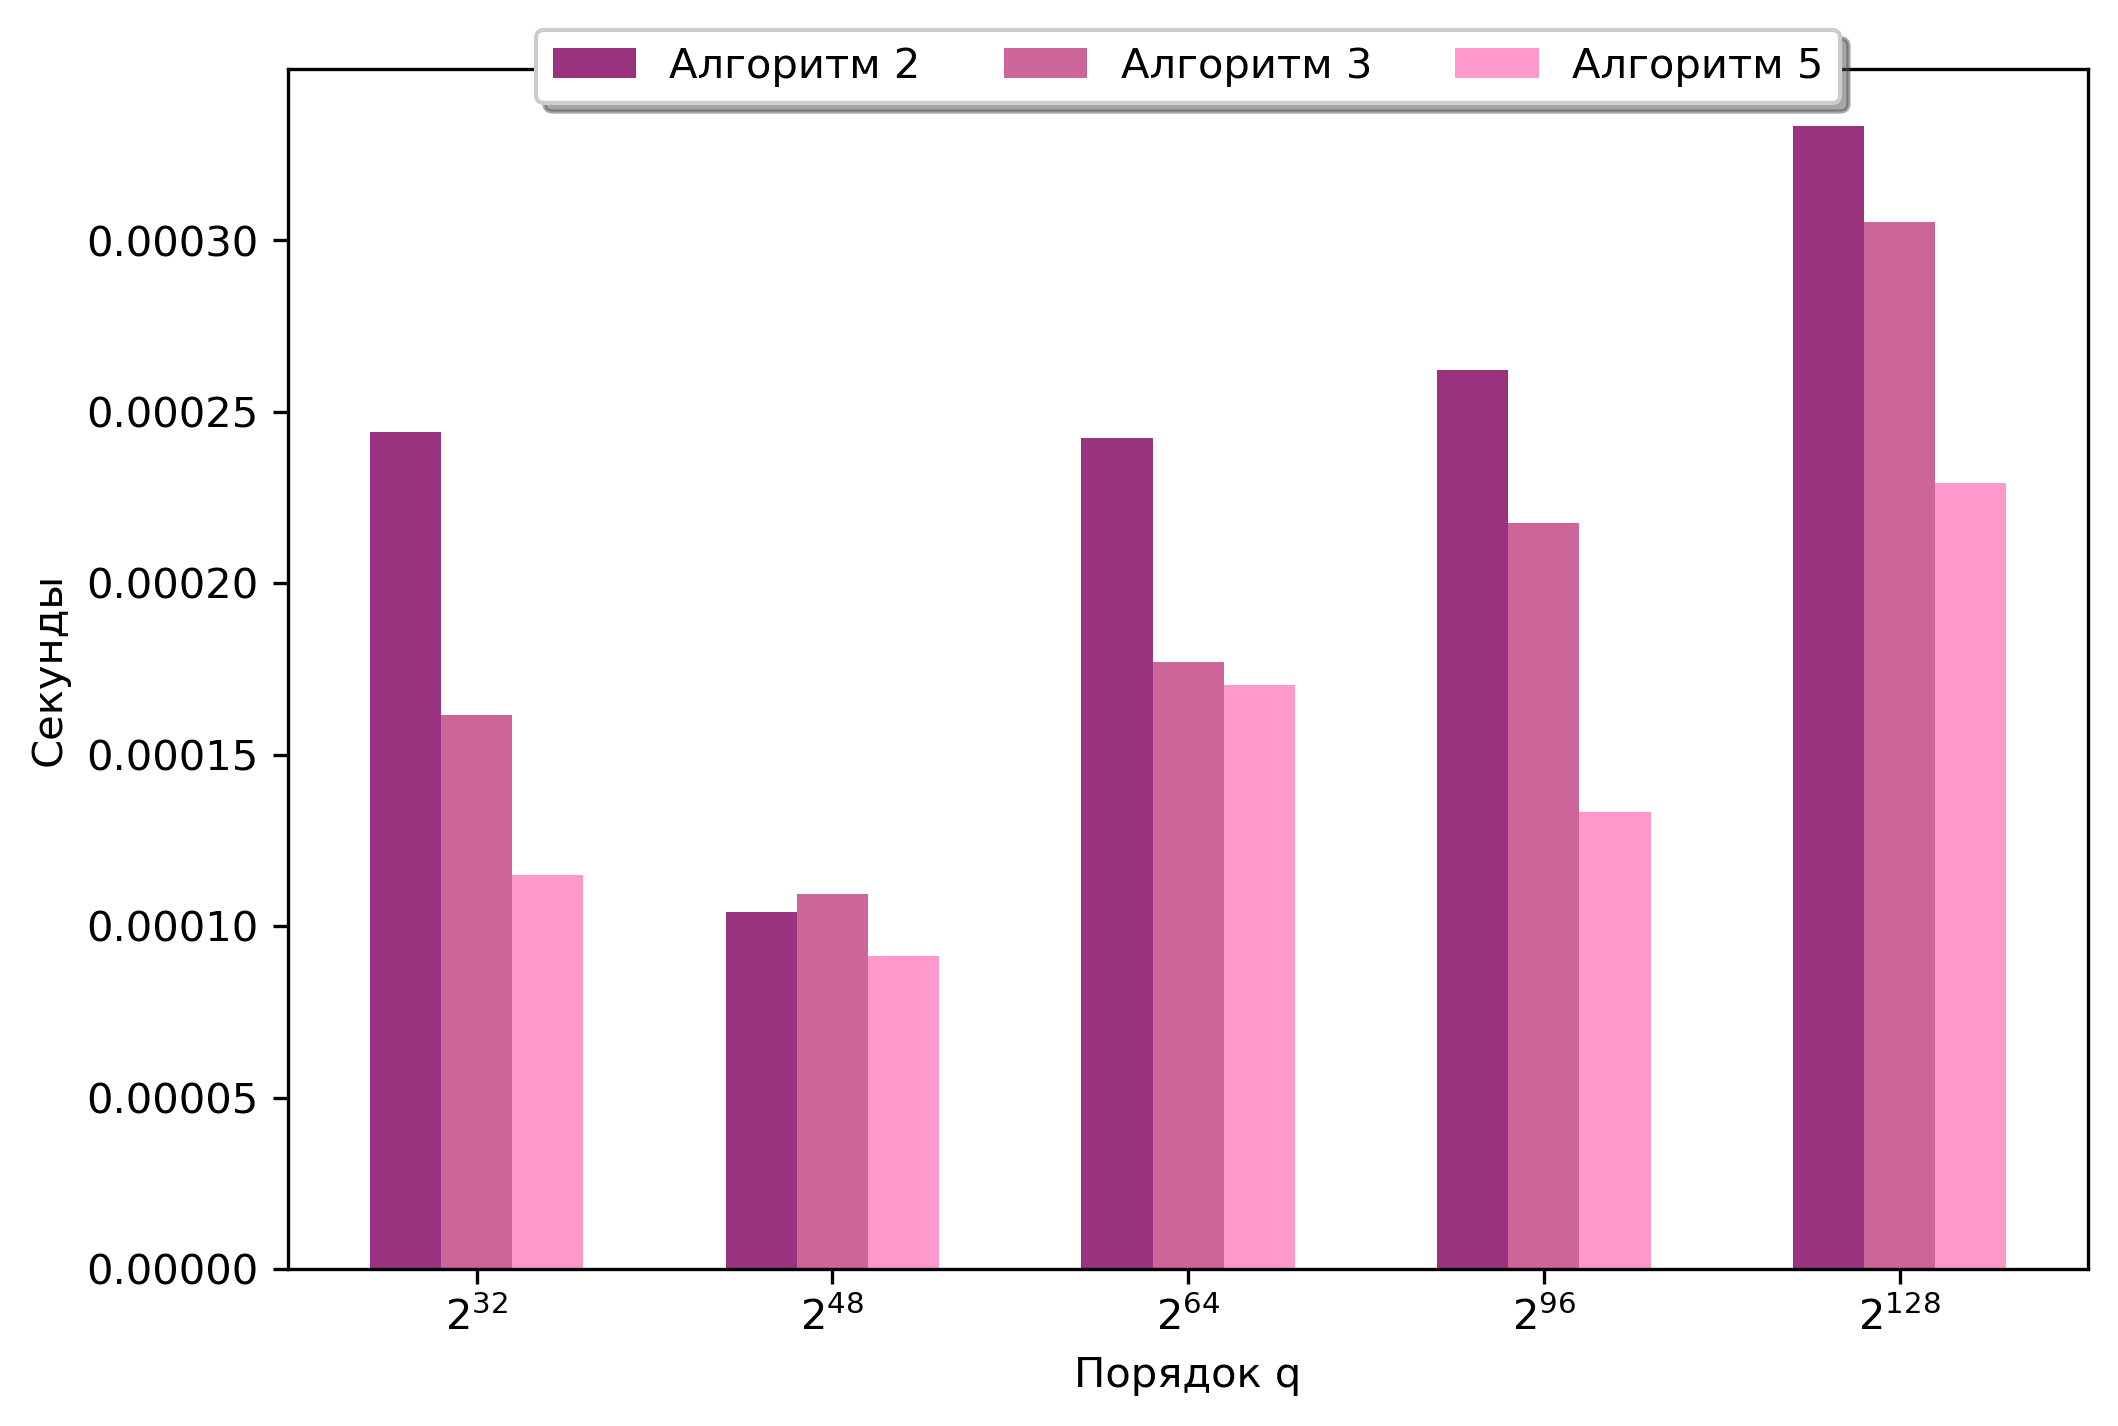

In [341]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ind = np.arange(5)
width = 0.2
ax.bar(ind,average_time_2, width,label="Алгоритм 2",color=colors_list[1])
ax.bar(ind + width,average_time_3, width,label="Алгоритм 3",color=colors_list[2])
ax.bar(ind + 2*width,average_time_5, width,label="Алгоритм 5",color=colors_list[4])
plt.xticks(ind + width, ("$2^{32}$", "$2^{48}$", "$2^{64}$", "$2^{96}$", "$2^{128}$"))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.xlabel("Порядок q")
plt.ylabel("Секунды")
plt.gcf().set_dpi(300)
plt.show()

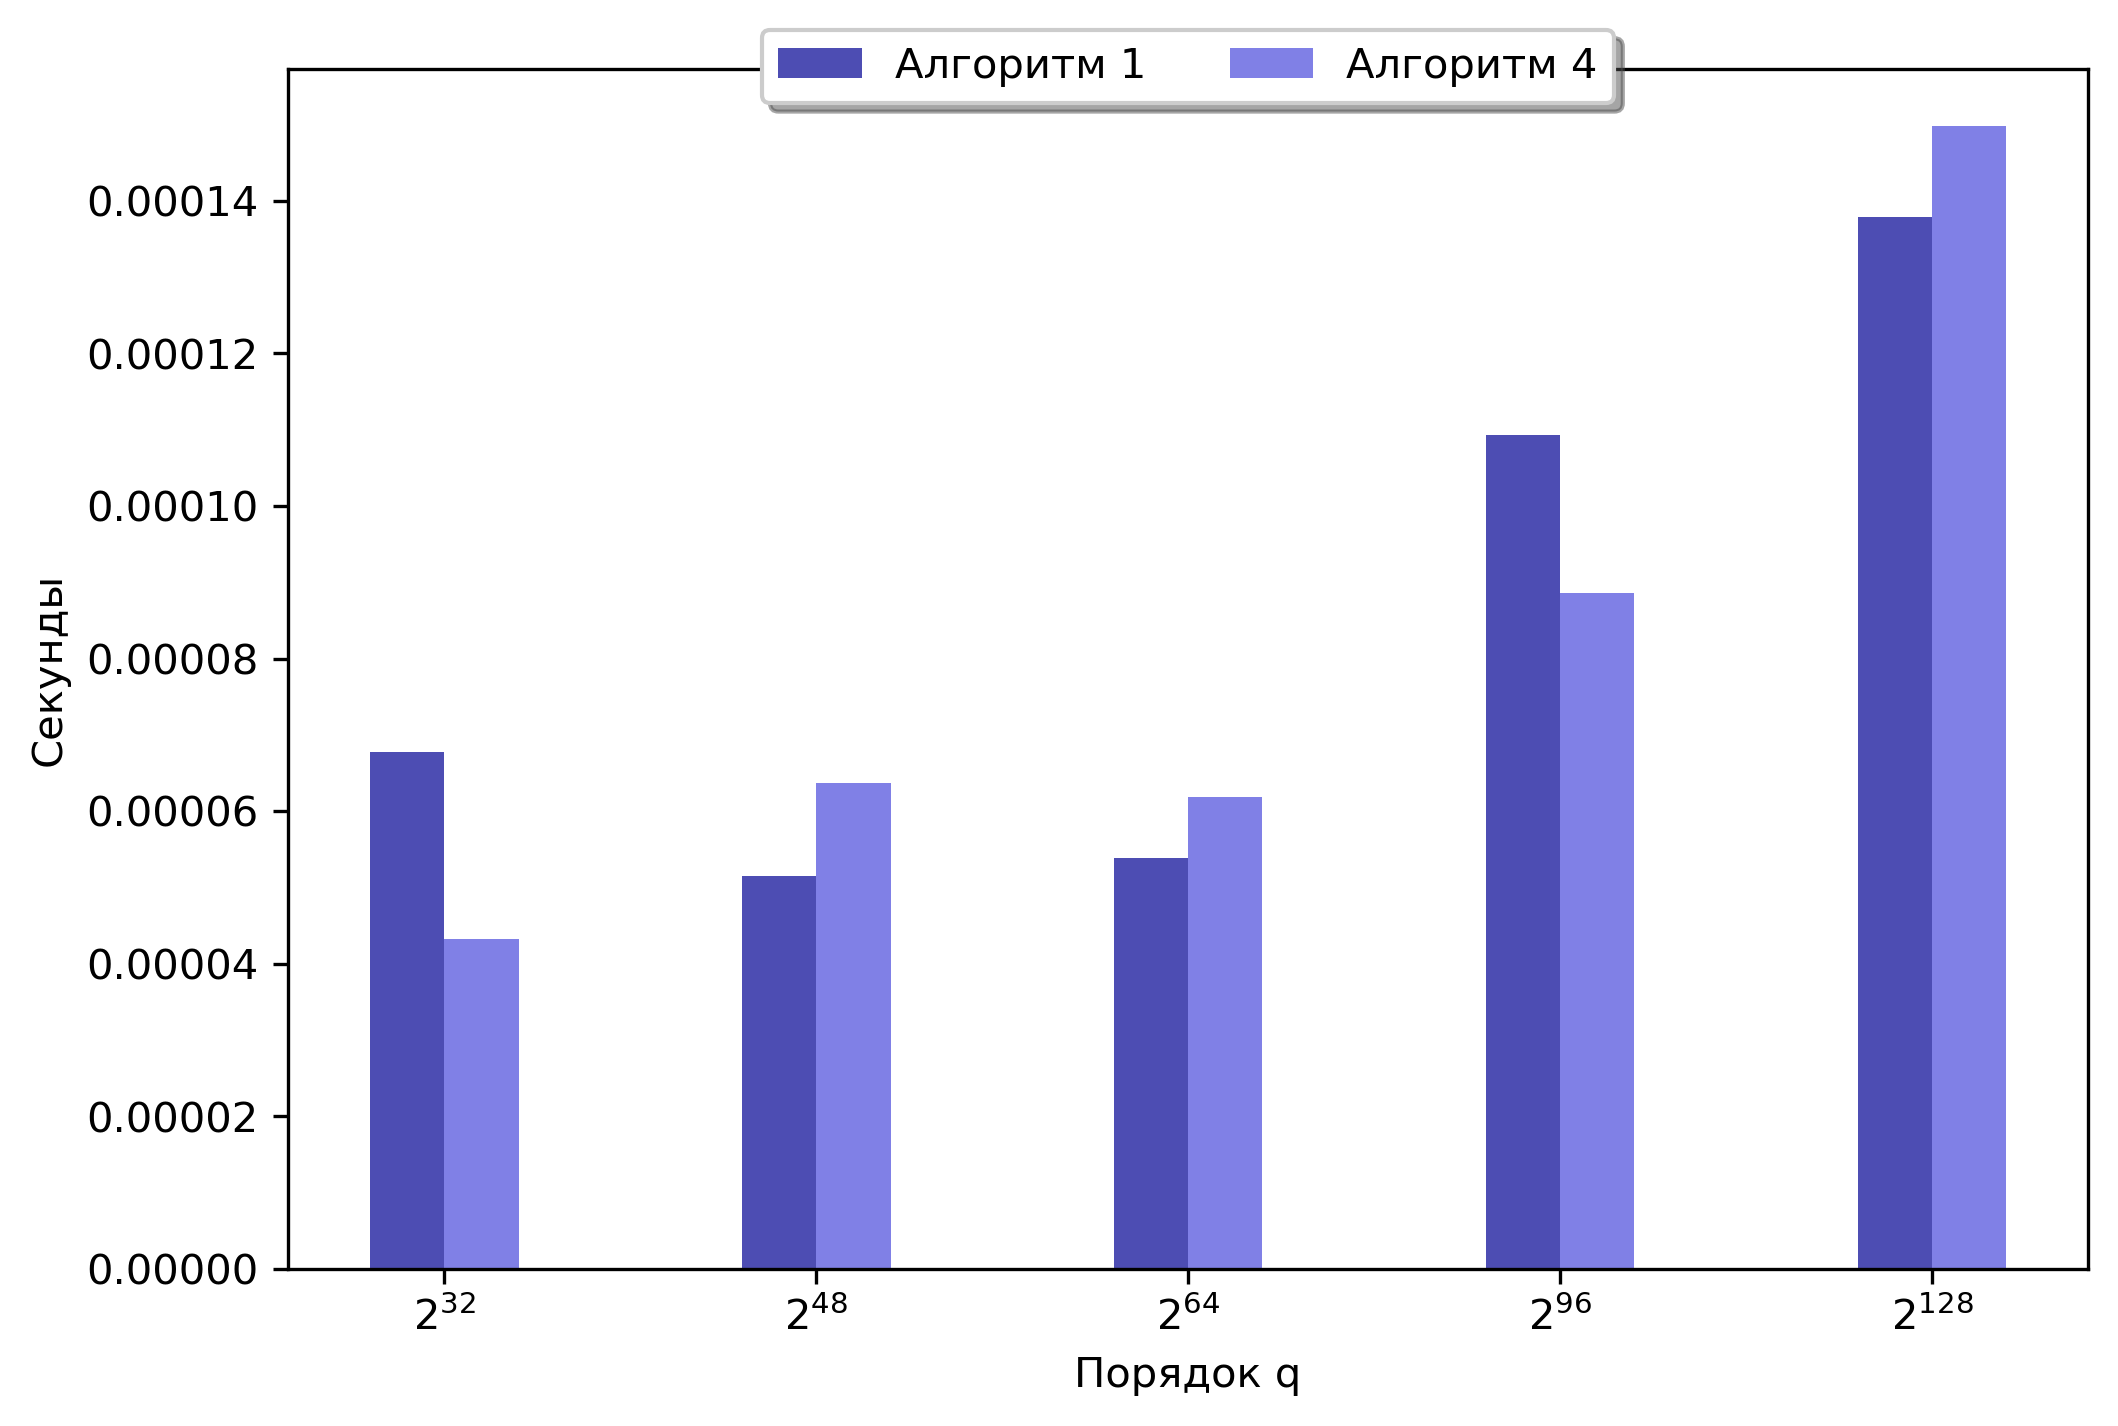

In [342]:
import numpy as np

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ind = np.arange(5)
width = 0.2
ax.bar(ind + 0.1,average_time_1, width,label="Алгоритм 1",color=colors_list[0])
ax.bar(ind + width + 0.1,average_time_4, width,label="Алгоритм 4",color=colors_list[3])
plt.xticks(ind + width, ("$2^{32}$", "$2^{48}$", "$2^{64}$", "$2^{96}$", "$2^{128}$"))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.xlabel("Порядок q")
plt.ylabel("Секунды")
plt.gcf().set_dpi(300)
plt.show()